In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from collections import Counter
from collections import defaultdict

In [93]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

import re
import string

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk import punkt

In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
train = pd.read_csv('train.csv')
overview = pd.read_csv('game_overview.csv')
test = pd.read_csv('test.csv')

In [24]:
length_review_train = train["user_review"].str.len()
length_review_test = test["user_review"].str.len()

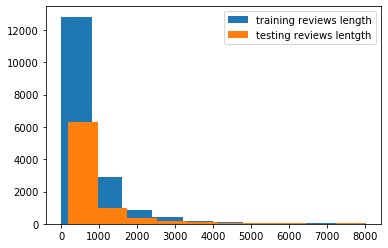

In [28]:
plt.hist(length_review_train,bins=10,label='training reviews length')
plt.hist(length_review_test,bins=10,label='testing reviews lentgth')
plt.legend()
plt.show()

In [77]:
train.head(3)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1


In [76]:
train

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [30]:
overview.head(2)

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...


In [36]:
def create_corpus(df,label):
    corpus=[]
    for review in df[df["user_suggestion"]==label]["user_review"].str.split():
        for word in review:
            corpus.append(word)
    return corpus

In [45]:
yes_corpus = create_corpus(train,1)

yes_count = Counter(yes_corpus)
yes_count.most_common(20)

[('the', 46071),
 ('to', 36185),
 ('and', 36098),
 ('a', 32801),
 ('of', 23494),
 ('is', 23007),
 ('you', 22211),
 ('game', 19875),
 ('I', 17262),
 ('it', 14571),
 ('this', 13787),
 ('in', 13662),
 ('for', 12986),
 ('that', 12121),
 ('with', 9945),
 ('are', 9651),
 ('but', 9176),
 ('have', 8683),
 ('can', 8177),
 ('on', 7774)]

In [46]:
no_corpus = create_corpus(train,0)

no_count = Counter(no_corpus)
no_count.most_common(20)

[('the', 40987),
 ('to', 32452),
 ('and', 26561),
 ('a', 24652),
 ('you', 18001),
 ('of', 17970),
 ('game', 16771),
 ('is', 16217),
 ('I', 14417),
 ('it', 12288),
 ('this', 11964),
 ('in', 11119),
 ('that', 10819),
 ('for', 10708),
 ('with', 8028),
 ('have', 7826),
 ('but', 7557),
 ('are', 7183),
 ('on', 6398),
 ('not', 5948)]

In [54]:
yes_words = []
for word in yes_corpus:
    if word in stop:
        pass
    else:
        yes_words.append(word)

In [55]:
no_words = []
for word in no_corpus:
    if word in stop:
        pass
    else:
        no_words.append(word)

In [58]:
yes_count = Counter(yes_words)
yes_count.most_common(20)

[('game', 19875),
 ('I', 17262),
 ('like', 6616),
 ('get', 5475),
 ('play', 5134),
 ('The', 5092),
 ('Access', 3445),
 ('Early', 3425),
 ('really', 3366),
 ('good', 3354),
 ('game.', 3226),
 ('one', 3132),
 ('fun', 2906),
 ('time', 2663),
 ('game,', 2586),
 ('would', 2541),
 ('This', 2464),
 ('playing', 2461),
 ('even', 2336),
 ('much', 2314)]

In [59]:
no_count = Counter(no_words)
no_count.most_common(20)

[('game', 16771),
 ('I', 14417),
 ('get', 5332),
 ('like', 4391),
 ('play', 4056),
 ('The', 3562),
 ('even', 3275),
 ('Access', 2636),
 ('one', 2502),
 ('Early', 2501),
 ('time', 2497),
 ('game.', 2427),
 ('good', 2275),
 ('would', 2207),
 ('really', 2142),
 ('game,', 2073),
 ('new', 2046),
 ('money', 2041),
 ('make', 1902),
 ('want', 1863)]

In [81]:
def get_top_review_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2 )).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [82]:
get_top_review_bigrams(yes_corpus,10)

[('nope nope', 1599),
 ('you re', 1226),
 ('you ll', 707),
 ('10 10', 476),
 ('in game', 341),
 ('you ve', 245),
 ('they re', 242),
 ('to play', 222),
 ('free to', 219),
 ('medic medic', 169)]

In [83]:
get_top_review_bigrams(no_corpus,10)

[('you re', 969),
 ('you ll', 484),
 ('they re', 242),
 ('in game', 203),
 ('you ve', 160),
 ('pay to', 157),
 ('to win', 124),
 ('they ve', 123),
 ('to play', 103),
 ('hi rez', 100)]

In [87]:
#preprocessing\
#remove URl
def remove_url(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"",text)

In [94]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [123]:
test.head(2)

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...


In [127]:
df=pd.concat([train,test])
df.shape

C:\Users\rautc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(25539, 5)

In [128]:
df['user_reivew']=df['user_review'].apply(lambda x : remove_url(x))
df['user_reivew']=df['user_review'].apply(lambda x : remove_punct(x))

In [129]:
def create_corpora(df):
    corpus=[]
    for tweet in tqdm(df['user_review']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus


In [130]:
corpus = create_corpora(df)

100%|███████████████████████████████████████████████████████████████████████████| 25539/25539 [00:35<00:00, 710.67it/s]


In [131]:
embedding_dict={}
with open('glove.6B.100d.txt','r',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [132]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

review_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [133]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 60042


In [134]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|████████████████████████████████████████████████████████████████████████| 60042/60042 [00:00<00:00, 383459.59it/s]


In [135]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           6004300   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,046,605
Trainable params: 42,305
Non-trainable params: 6,004,300
_________________________________________________________________


In [137]:
train.shape[0]

17494

In [138]:
train_final = review_pad[:train.shape[0]]
test_final = review_pad[train.shape[0]:]

In [139]:
X_train,X_test,y_train,y_test=train_test_split(train_final,train['user_suggestion'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (14869, 50)
Shape of Validation  (2625, 50)


In [140]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Train on 14869 samples, validate on 2625 samples
Epoch 1/15
 - 67s - loss: 0.6918 - accuracy: 0.5531 - val_loss: 0.6834 - val_accuracy: 0.5771
Epoch 2/15
 - 68s - loss: 0.6851 - accuracy: 0.5675 - val_loss: 0.6790 - val_accuracy: 0.5798
Epoch 3/15
 - 77s - loss: 0.6825 - accuracy: 0.5676 - val_loss: 0.6748 - val_accuracy: 0.5825
Epoch 4/15
 - 71s - loss: 0.6760 - accuracy: 0.5787 - val_loss: 0.6695 - val_accuracy: 0.5882
Epoch 5/15
 - 73s - loss: 0.6710 - accuracy: 0.5877 - val_loss: 0.6601 - val_accuracy: 0.5985
Epoch 6/15
 - 70s - loss: 0.6646 - accuracy: 0.5947 - val_loss: 0.6420 - val_accuracy: 0.6236
Epoch 7/15
 - 72s - loss: 0.6543 - accuracy: 0.6118 - val_loss: 0.6170 - val_accuracy: 0.6522
Epoch 8/15
 - 69s - loss: 0.6438 - accuracy: 0.6273 - val_loss: 0.5982 - val_accuracy: 0.6800
Epoch 9/15
 - 66s - loss: 0.6377 - accuracy: 0.6316 - val_loss: 0.5934 - val_accuracy: 0.6846
Epoch 10/15
 - 66s - loss: 0.6336 - accuracy: 0.6414 - val_loss: 0.5831 - val_accuracy: 0.7006
Epoch 11/1

In [141]:
y_pre=model.predict(test_final)
y_pre=np.round(y_pre).astype(int).reshape(8045)
sub=pd.DataFrame({'review_id':test['review_id'].values.tolist(),'user_suggestion':y_pre})
sub.to_csv('submission.csv',index=False)